<img src="https://www.inf.utfsm.cl/images/slides/Departamento-de-Informtica_HORIZONTAL.png" title="Title text" width="80%" />

<hr style="height:2px;border:none"/>

<H3 align='center'> MTI-PGE 2025 </H3>

<h1 align='center'>  Inteligencia Artificial y Aprendizaje Automático </h1>

<H3 align='center'> Trabajo Final </H3>

<H5 align='center'> Integrantes: Leonardo Fuentes</H3>

<H5 align='center'> Link al Video:  </H3>

<hr style="height:2px;border:none"/>





Link al desafío Kaggle https://www.kaggle.com/t/53be92513ca345a6a7454b1a91035358

## **Introducción**

Como en muchas otras áreas, la inteligencia artificial ha transformado significativamente el ámbito de la ciberseguridad, gracias a su capacidad para analizar grandes volúmenes de datos, modelar comportamientos complejos y detectar patrones asociados a actividades maliciosas. En particular, los enfoques basados en machine learning y deep learning han demostrado ser especialmente efectivos en la detección de anomalías en el tráfico de red, permitiendo identificar ataques sofisticados que pueden pasar inadvertidos para analistas humanos o sistemas tradicionales basados en reglas estáticas.

En esta tarea se proporciona el dataset UNSW-NB15, el cual contiene flujos de tráfico de red normal junto con múltiples categorías de ataques realistas y contemporáneos. Entre los escenarios de ataque presentes se incluyen, entre otros, DoS, Exploits, Reconnaissance, Fuzzers, Generic, Backdoors, Shellcode y Worms, representando una amplia variedad de técnicas utilizadas en entornos reales.

Cada flujo de red está descrito mediante un conjunto extenso de atributos que abarcan información básica de la comunicación, como direcciones IP y puertos de origen y destino, el protocolo de transporte utilizado (por ejemplo, TCP, UDP o ICMP), así como métricas temporales relacionadas con la duración del flujo. Adicionalmente, se incluyen características estadísticas y volumétricas, tales como el número de paquetes y bytes transmitidos, estados de conexión y otros indicadores de comportamiento relevantes para la detección de intrusiones.

El dataset permite abordar tanto clasificación binaria (tráfico normal vs. malicioso) como clasificación multiclase, diferenciando entre los distintos tipos de ataque. Su tarea consistirá en desarrollar un sistema basado en deep learning capaz de clasificar, de manera individual, los flujos de red presentes en el conjunto de pruebas (test), evaluando el desempeño del modelo en un escenario realista de detección de intrusiones. Para lo anterior usaremos el enfoque multiclase


## **Entregables**

* Se debe entregar el código utilizado en formato Jupyter notebook para poder **reproducir los resultados** presentados. El notebook debe estar seccionado y  ordenado para permitir identificar las celdas correspondientes a cada parte del trabajo y poder reproducir las predicciones subidas a Kaggle (si alguna pieza de la solución se carga pre-construida, deben incorporarse los archivos o los links necesarios para la ejecución completa del código).

* Se debe preparar un video de **10 a 15 minutos** donde se explique cómo se abordó el trabajo:

    - Se debe narrar brevemente la estrategia de solución adoptada enfocándose en aquello que los autores creen que la hará la solución ganadora.

    - Se descontarán 5 puntos por cada minuto excedido en el video.

    - En la cabecera del notebook pueden indicar un link al vide en youtube. Alternativamente pueden entregar un link a otro repositorio (e.g. Drive), pero por favor asegúrense de que podamos acceder al material. En caso de no poder acceder al video, la entrega se considerará no efectuada.

    - Se descontarán 5 puntos por cada día de atraso en la entrega.

* Se debe subir al menos una submission a la plataforma Kaggle como se ha hecho en clases. Su desempeño tendrá las siguientes bonificaciones o descuentos:

  - 1er Lugar = +10 pts.
  - 2do y 3er Lugar = +7 pts.
  - 4to Lugar = +5 pts.
  - 5to o más = +0 pts.

  - No hacer submission a Kaggle = -10 pts.
  - No superar el puntaje baseline = -5 pts.
    
* La solución debe incluir un mecanismo para evaluar el desempeño que tendrá la solución en datos nuevos, independientemente del puntaje que observe en Kaggle.

**IMPORTANTE: No olvide incluir al final de este notebook sus referencias al trabajo de otros que haya utilizado** El uso de sistemas como chatGPT, Claude, sCite u otros está permitido, pero debe indicarse cómo se usaron.

# Desarrollo
La estructura del trabajo está dividida en 4 bloques principales:

1.   Librerías
2.   Carga de los datos
3.   Modelo
4.   Validación

# Librerías



Se incorporan las librerías necesarias para ejecutar el proyecto

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Input, BatchNormalization, Activation
from keras.callbacks import EarlyStopping
from google.colab import files
from collections import Counter

# Carga de los datos

El data set se obtendrá desde Kaggle, para ello será necesario cargar el archivo de credenciales legacy de kaggle, este servirá para interactuar con la API y realizar la descarga.

Si no se dispone del archivo de credenciales, se puede generar uno accediendo a la configuración de la cuenta en https://www.kaggle.com/settings/account y presionando el botón "Create Legacy API Key".

In [4]:
#Cargamos el archivo de credenciales
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leonardofuentes","key":"a74237f1488996f3cd47a44d39289c6c"}'}

In [4]:
# El CLI de Kaggle requiere de que el archivo de credenciales se encuentre en el
# directorio .kaggle del usuario que lo ejecuta, los siguientes comandos ubican
# el archivo en el lugar y con los permisos apropiados para su uso

# Crea directorio
os.makedirs('/root/.kaggle/', exist_ok=True)

# Mueve el archivo de credenciales
!mv kaggle.json /root/.kaggle/

# Estabece los permisos de lectura y escritura
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Probamos si la conexión a la API funciona revisando el leaderboard del desafío
# Este paso se puede omitir
!kaggle competitions leaderboard mti-2025-02-trabajo-final --show

  teamId  teamName                       submissionDate              score    
--------  -----------------------------  --------------------------  -------  
15082968  MTI_PGE_2025_JPI_MM_AZ         2026-01-13 11:54:18.136000  0.54024  
15037259  Leonardo Fuentes               2026-01-13 04:53:36.313000  0.51861  
15062026  UNSW-MTI_baseline.csv          2025-12-23 19:18:46.510000  0.49631  
15087878  Carlos Grandón Méndez          2026-01-13 02:28:54.706000  0.48905  
15059424  MTI TGerrero HJara HTapia      2026-01-13 15:40:46.383000  0.45673  
15083052  Yonathan Dossow                2026-01-13 04:08:52.186000  0.42188  
15083972  Tomás Guerrero                 2026-01-13 15:25:45.606000  0.25025  
15087523  HECTOR TAPIA BRIONES           2026-01-13 00:41:52.050000  0.23795  
15059241  MTI VMendoza-FCristi-CBascour  2026-01-13 15:20:48.626000  0.23745  


In [6]:
# Descargamos los archivos del desafío
!kaggle competitions download -c mti-2025-02-trabajo-final

# Dado que los archivos se encuentran en un empaquetado, es necesario extraerlos,
# los dejaremos en el directorio /content/data para futuros usos.
with zipfile.ZipFile('mti-2025-02-trabajo-final.zip', 'r') as zip_ref:
  zip_ref.extractall("/content/data")

  0% 0.00/140M [00:00<?, ?B/s]
100% 140M/140M [00:00<00:00, 1.63GB/s]


Una vez obtenidos los archivos con la data, entonces se procede a la carga de estos.

In [7]:
# Definimos los tipos de datos de las columnas que pueden parecer ambiguos
tipos_especificos = {
    'sport': str,
    'dsport': str,
    'ct_ftp_cmd': str
}

# Cargamos los datos de entrenamiento desde el archivo UNSW-MTI_train.csv
dataTrain = pd.read_csv('/content/data/UNSW-MTI_train.csv', dtype=tipos_especificos)
print("\nPrimeras filas del dataset de entrenamiento: ",dataTrain.shape,"\n")
display(dataTrain.head())

# Cargamos los datos de prueba desde el archivo UNSW-MTI_test_set.csv
dataTest = pd.read_csv('/content/data/UNSW-MTI_test_set.csv')
print("\nPrimeras filas del dataset de prueba: ",dataTest.shape,"\n")
display(dataTest.head())


Primeras filas del dataset de entrenamiento:  (2100003, 49) 



,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,---,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,---,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,---,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,---,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,---,0



Primeras filas del dataset de prueba:  (440044, 48) 



,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ID
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,NaN,,2,2,7,4,1,1,3,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,NaN,,3,1,4,4,1,1,1,1
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,NaN,,3,5,2,7,1,1,4,2
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,NaN,,1,1,4,7,1,1,3,3
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,NaN,,2,5,2,1,1,1,2,4


In [8]:
# Revisamos los tipos de ataques cargados en el dataset se entrenamiento
print("\nCantidad de datos por categoría de ataque:")
print(dataTrain['attack_cat'].value_counts())


Cantidad de datos por categoría de ataque:
attack_cat
---                 1867614
Generic              153603
Exploits              33086
 Fuzzers              13805
DoS                   11446
 Reconnaissance        8698
 Fuzzers               5051
Analysis               2007
Reconnaissance         1759
Backdoor               1129
 Shellcode              917
Backdoors               534
Shellcode               223
Worms                   131
Name: count, dtype: int64


In [9]:
# Identificamos que existen datos mal etiquetados, existiendo espacios antes y
# despues, así como tambien en singular y plural, por lo que procedemos a
# estandarizarlos

dataTrain['attack_cat'] = dataTrain['attack_cat'].str.strip()
dataTrain['attack_cat'] = dataTrain['attack_cat'].replace("Backdoor", "Backdoors")

# Con esto quedamos con las 10 categorías indicadas por la descripción del dataset
print("Categorías de ataques en datos de entrenamiento normalizado: \n" , dataTrain['attack_cat'].value_counts())

Categorías de ataques en datos de entrenamiento normalizado: 
 attack_cat
---               1867614
Generic            153603
Exploits            33086
Fuzzers             18856
DoS                 11446
Reconnaissance      10457
Analysis             2007
Backdoors            1663
Shellcode            1140
Worms                 131
Name: count, dtype: int64


Acá es importante notar que la cantidad de registros normales, es muy superior a los registros de ataques, esto influirá en la metodología a abordar para el modelo.

In [10]:
# Guardamos los id del dataTest para usarlo en la submision a kaggle
test_ids = dataTest['ID'].copy()

In [11]:
# Para los datasets, arreglamos las columnas con problemas 'ct_flw_http_mthd',
# 'is_ftp_login' y'ct_ftp_cmd'

for df in [dataTrain, dataTest]:
    # Limpiar ct_ftp_cmd (strings vacíos o con espacios) reemplazandolos por NaN
    df['ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(str).str.strip().replace('', np.nan)
    # Seteamos los valores NaN con el valor esperado por columna
    df['ct_flw_http_mthd'] = df['ct_flw_http_mthd'].fillna(0.0).astype(float)
    df['is_ftp_login'] = df['is_ftp_login'].fillna(0.0).astype(float)
    df['ct_ftp_cmd'] = df['ct_ftp_cmd'].fillna(0).astype(int)

In [12]:
# Preparación de la variable objetivo

# Transformamos la columna attack_cat de texto a números, el encoder usará las
# categorías aprendidas con el dataset de entrenamiento en el de test.
le_attack_cat = LabelEncoder()
dataTrain['attack_cat_encoded'] = le_attack_cat.fit_transform(dataTrain['attack_cat'])
# Revisamos las categorias de attack_cat
print("Categorias de ataque etiquetadas: \n")
for idx, clase in enumerate(le_attack_cat.classes_):
    print(f"{idx}: {clase}")

# Definimos la variable objetivo
y_train = dataTrain['attack_cat_encoded']

Categorias de ataque etiquetadas: 

0: ---
1: Analysis
2: Backdoors
3: DoS
4: Exploits
5: Fuzzers
6: Generic
7: Reconnaissance
8: Shellcode
9: Worms


In [13]:
# Preparamos las variables de entrada

# Definimos las columnas que no deben usarse como caracteristicas
drop_cols = ['Label', 'attack_cat', 'attack_cat_encoded', 'srcip', 'dstip', 'stcpb', 'dtcpb', 'trans_id']

# Las eliminamos de los datos del entrenamiento
X_train = dataTrain.drop(columns=[c for c in drop_cols if c in dataTrain.columns])

# Tambien en el conjunto de los datos de test, adicionalmente eliminamos el ID
# para que mantengan la misma cantidad de columnas
X_test = dataTest.drop(columns=[c for c in (drop_cols + ['ID']) if c in dataTest.columns])

In [14]:
# Tranformamos las variables de tipo objeto (como proto y service) en categorías
# numéricas
categorical_cols = X_train.select_dtypes(include='object').columns
for col in categorical_cols:
    mapping = {v: i for i, v in enumerate(X_train[col].astype(str).unique())}
    X_train[col] = X_train[col].astype(str).map(mapping).fillna(-1).astype(int)
    X_test[col] = X_test[col].astype(str).map(mapping).fillna(-1).astype(int)


In [15]:
# Realizamos el escalamiento, se tratará de manera diferente para los modelos
# binario y especialista

# Para el modelo Binario, se utilizará un escalado estandar
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Para el modelo Especialista, debido a que los datos tienen mucha diferencia en
# su frecuencia (generic v/s worm) no se puede utilizar el estandar, por lo que
# se soptó por PowerTransformer, Esto ayuda a que los ataques minoritarios sean
# más "visibles".
scaler_pwr = PowerTransformer(method='yeo-johnson')
X_train_pwr = scaler_pwr.fit_transform(X_train)
X_test_pwr = scaler_pwr.transform(X_test)

In [16]:
# Separación de los datos para evaluación

# Si bien se provee de un dataset de test, este sirve para evaluar el modelo en
# Kaggle, para poder tener nuestras propias evaluaciones, separaremos desde los
# datos de entrenamiento un subconjunto para las evaluaciones locales, este
# conjunto no sera visto durante el entrenamiento.

# Definimos la variable objetivo original (nombres de texto) para la evaluación final
y_train_text = dataTrain['attack_cat'].values

# Realizamos la partición de índices
# Esto garantiza que el 20% de validación sea el mismo para ambos escalados
indices = np.arange(X_train_std.shape[0])
train_idx, val_idx = train_test_split(
    indices,
    test_size=0.20,
    random_state=42,
    stratify=y_train
)

# Creamos los conjuntos de Entrenamiento Final
X_train_bin_final = X_train_std[train_idx]    # Para el modelo Binario
X_train_esp_final = X_train_pwr[train_idx]    # Para el modelo Especialista
y_train_final = y_train[train_idx]            # Etiquetas codificadas para el entrenamiento

# Creamos los conjuntos de Validación Local
X_val_bin = X_train_std[val_idx]
X_val_esp = X_train_pwr[val_idx]
y_val_local_text = y_train_text[val_idx]

print(f"Entrenamiento: {len(train_idx)} registros")
print(f"Validación:    {len(val_idx)} registros")

Entrenamiento: 1680002 registros
Validación:    420001 registros


# Modelo

Como vimos anteriormente, existe una gran diferencia entre la cantidad de datos normales v/s los que corresponden a ataque, esto amerita que la solución se enfoque en un modelo en cascada, donde en primera instancia se identifique si corresponde a un tráfico normal o ataque, para posteriormente analizar el tipo de ataque.

## Modelo para Clasificación Binaria

In [17]:
# Definimos la variable objetivo binaria, 1=Ataque, 0=Normal
y_train_bin_final = (y_train_final != le_attack_cat.transform(['---'])[0]).astype(int)

# Definimos el modelo binario
model_bin = Sequential([
    Input(shape=(X_train_bin_final.shape[1],)),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

# Definimos las configuraciones del entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_bin.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
history_bin = model_bin.fit(
    X_train_bin_final,
    y_train_bin_final,
    epochs=50,
    batch_size=1024,
    class_weight={0: 1.0, 1: 3.0},
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Verificamos
clases, conteos = np.unique(y_train_bin_final, return_counts=True)
print("\nDistribución de clases en el set de entrenamiento final (80%):")
for cls, count in zip(clases, conteos):
    label = "Ataque (1)" if cls == 1 else "Normal (0)"
    print(f"{label}: {count} muestras")

Epoch 1/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9709 - loss: 0.1123 - val_accuracy: 0.9895 - val_loss: 0.0186
Epoch 2/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9893 - loss: 0.0282 - val_accuracy: 0.9891 - val_loss: 0.0189
Epoch 3/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0264 - val_accuracy: 0.9893 - val_loss: 0.0176
Epoch 4/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9893 - loss: 0.0260 - val_accuracy: 0.9894 - val_loss: 0.0176
Epoch 5/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0250 - val_accuracy: 0.9894 - val_loss: 0.0170
Epoch 6/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9895 - loss: 0.0249 - val_accuracy: 0.9897 - val_loss: 0.0165
Epoch 7/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9899 - loss: 0.0240 - val_accuracy: 0.9898 - val_loss: 0.0162
Epoch 8/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9899 - loss: 0.0239 

## Modelo Especialista de Ataques

In [24]:

# Modelo especialista

# Dentro del conjunto de entrenamiento definido (X_train_esp_final) filtramos
# las filas que corresponden solo a ataques

label_normal = le_attack_cat.transform(['---'])[0]
solo_ataques_mask_train = (y_train_final != label_normal)
X_train_ataques_final = X_train_esp_final[solo_ataques_mask_train]

# Obtenemos los nombres originales de los ataques para el re-encoding del modelo
# especialista
y_train_ataques_text_final = dataTrain.iloc[train_idx].loc[solo_ataques_mask_train, 'attack_cat']

# Re-ajustamos el LabelEncoder del especialista con estos datos
le_ataques = LabelEncoder()
y_train_ataques_enc_final = le_ataques.fit_transform(y_train_ataques_text_final)
num_classes = len(le_ataques.classes_)

# Generamos los pesos para las clases, esto debido a que existe mucha diferencia
# en la frecuencia (Generic v/s worms)
counts = y_train_ataques_text_final.value_counts()
weights = 1.0 / (counts ** 0.5)
weights = weights / weights.min()
dict_pesos_final = {int(le_ataques.transform([k])[0]): float(v) for k, v in weights.items()}

# Definimos el modelo especialista
inputs = Input(shape=(X_train_ataques_final.shape[1],))

x = Dense(256, activation='relu')(inputs)
x = BatchNormalization()(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

outputs = Dense(num_classes, activation='softmax')(x)

model_especialista = Model(inputs=inputs, outputs=outputs)



# Definimos las configuraciones del entrenamiento
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=12,restore_best_weights=True)

model_especialista.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamos el modelo
model_especialista.fit(
    X_train_ataques_final,
    y_train_ataques_enc_final,
    epochs=100,
    batch_size=1024,
    validation_split=0.15,
    class_weight=dict_pesos_final,
    callbacks=[early_stop],
    verbose=1
)

# Verificación
print("\nDistribución de categorías de ataque en el set especialista:")
# Usamos el conteo que ya calculaste para los pesos
for categoria, conteo in counts.items():
    print(f"{categoria:15s}: {conteo} muestras")


Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7949 - loss: 2.1480 - val_accuracy: 0.8642 - val_loss: 0.5074
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8624 - loss: 1.2605 - val_accuracy: 0.8761 - val_loss: 0.3800
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8677 - loss: 1.1665 - val_accuracy: 0.8761 - val_loss: 0.3368
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8697 - loss: 1.1223 - val_accuracy: 0.8775 - val_loss: 0.3264
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8703 - loss: 1.0894 - val_accuracy: 0.8778 - val_loss: 0.3203
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8714 - loss: 1.0746 - val_accuracy: 0.8749 - val_loss: 0.3263
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8739 - loss: 1.0451 - val_accuracy: 0.8731 - val_loss: 0.3280
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8753 - loss: 1.0449 - val_acc

# Evaluación del modelo

## Evaluación Local

In [21]:

# Validamos modelo Binario
val_prob_bin = model_bin.predict(X_val_bin)
val_es_ataque = (val_prob_bin > 0.50).astype(int).flatten()

# Validamos modelo Especialista
val_probs_esp = model_especialista.predict(X_val_esp)
val_indices = val_probs_esp.argmax(axis=1)
val_confianza = val_probs_esp.max(axis=1)
val_nombres_ataques = le_ataques.inverse_transform(val_indices)

# Combinamos los resultados de la validación
y_val_final_pred = []
for i in range(len(val_es_ataque)):
    if val_es_ataque[i] == 0:
        y_val_final_pred.append('---')
    else:
        if val_confianza[i] < 0.35:
            y_val_final_pred.append('Generic')
        else:
            y_val_final_pred.append(str(val_nombres_ataques[i]))

# Generamos el reporte
print("\n Reporte de evaluación")
print(classification_report(y_val_local_text, y_val_final_pred, digits=4))

macro_f1 = f1_score(y_val_local_text, y_val_final_pred, average='macro')
print(f"F1-Score Macro Local: {macro_f1:.4f}")

13126/13126 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
13126/13126 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step

 Reporte de evaluación
                precision    recall  f1-score   support

           ---     0.9990    0.9917    0.9953    373523
      Analysis     0.1818    0.1397    0.1580       401
     Backdoors     0.6087    0.1261    0.2090       333
           DoS     0.4108    0.1166    0.1817      2289
      Exploits     0.8081    0.5710    0.6691      6617
       Fuzzers     0.5126    0.7799    0.6186      3771
       Generic     0.8629    0.9896    0.9219     30721
Reconnaissance     0.8618    0.8284    0.8447      2092
     Shellcode     0.5285    0.8947    0.6645       228
         Worms     0.1356    0.6154    0.2222        26

      accuracy                         0.9759    420001
     macro avg     0.5910    0.6053    0.5485    420001
  weighted avg     0.9764    0.9759    0.9746    420001

F1-Score Macro Local: 0.5485


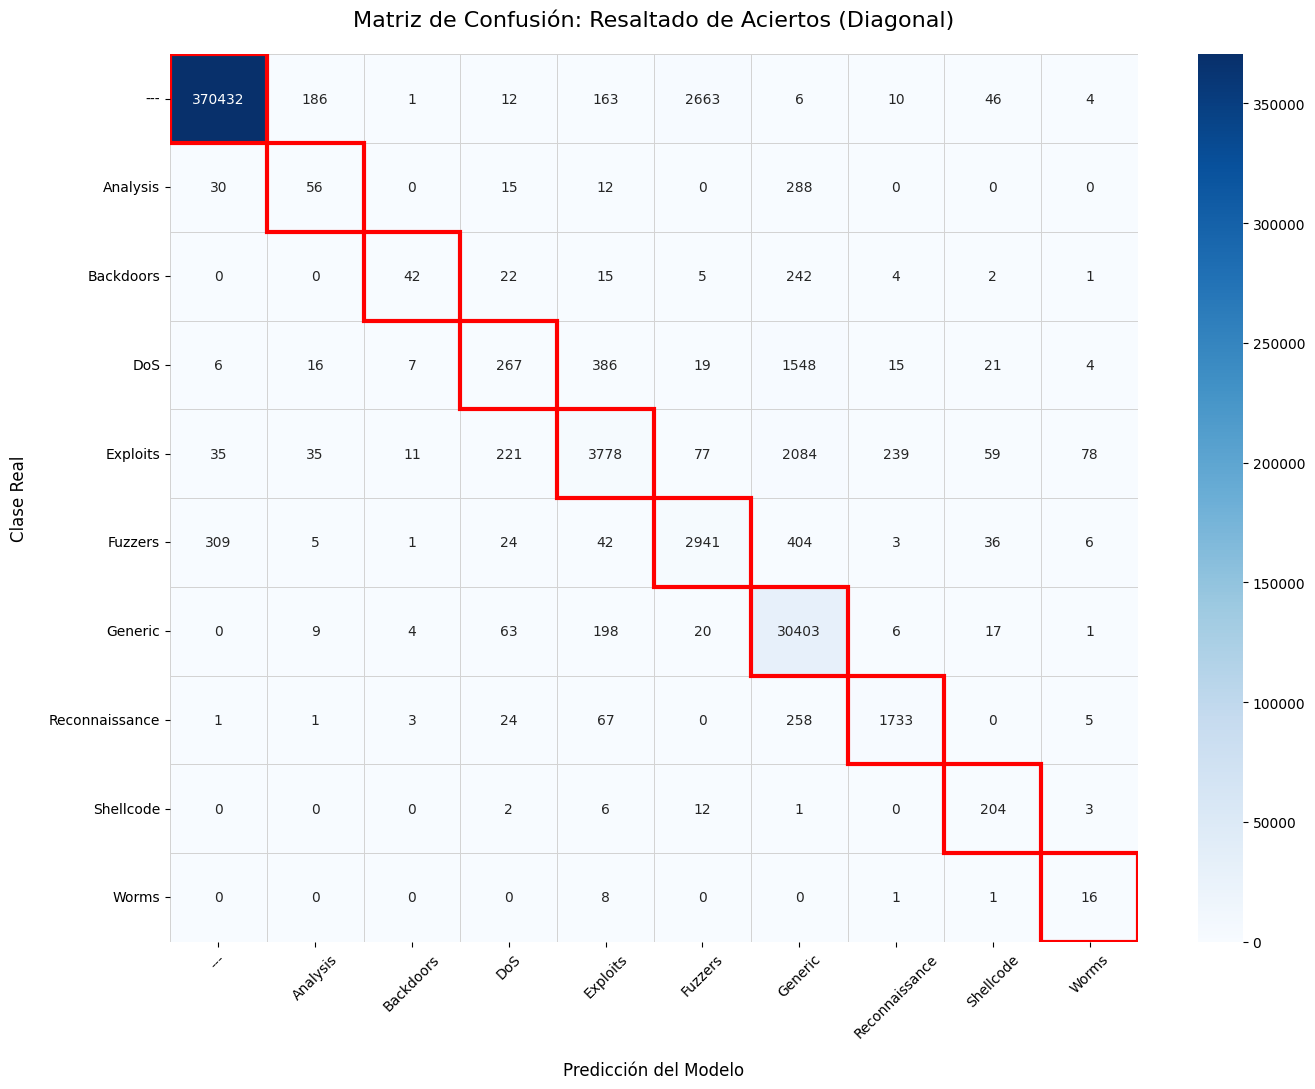

In [20]:
# Matriz de confusión

# Preparamos los datos
etiquetas_ordenadas = sorted(np.unique(y_val_local_text))
cm = confusion_matrix(y_val_local_text, y_val_final_pred, labels=etiquetas_ordenadas)

# Se crea la visualización
plt.figure(figsize=(14, 11))

# Usamos un mapa de colores que haga resaltar los valores altos (diagonal)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=etiquetas_ordenadas,
    yticklabels=etiquetas_ordenadas,
    linewidths=.5,      # Líneas finas entre celdas
    linecolor='lightgrey'
)

# Para mejor identificación resaltaremos la diagonal
for i in range(len(etiquetas_ordenadas)):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='red', lw=3))

# Imprmimos la matriz
plt.title('Matriz de Confusión: Resaltado de Aciertos (Diagonal)', fontsize=16, pad=20)
plt.xlabel('Predicción del Modelo', fontsize=12, labelpad=15)
plt.ylabel('Clase Real', fontsize=12, labelpad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

## Kaggle

In [25]:
# Predicción del modelo binario
prob_binaria = model_bin.predict(X_test_std)
es_ataque = (prob_binaria > 0.50).astype(int).flatten()

# Predicción del modelo especialista
probs_especialista = model_especialista.predict(X_test_pwr)
pred_especialista_indices = probs_especialista.argmax(axis=1)
confianza = probs_especialista.max(axis=1)

nombres_ataques = le_ataques.inverse_transform(pred_especialista_indices)
predicciones_finales_nombres = []

# Combinamos las predicciones
for i in range(len(es_ataque)):
    if es_ataque[i] == 0:
        predicciones_finales_nombres.append('---')
    else:
        # Mantener tu lógica de rescate que te dio buen resultado
        if confianza[i] < 0.35:
            predicciones_finales_nombres.append('Generic')
        else:
            predicciones_finales_nombres.append(str(nombres_ataques[i]))

# Generamos el archivo con las predicciones para kaggle
csv_filename = 'submission.csv'
submission = pd.DataFrame({'ID': test_ids, 'attack_cat': predicciones_finales_nombres})
submission.to_csv(csv_filename, index=False)

# Mostramos metricas
print("\nResumen de predicciones finales para Kaggle:")
conteo_final = Counter(predicciones_finales_nombres)
for categoria, cantidad in conteo_final.most_common():
    print(f"{categoria:15s}: {cantidad} muestras")

print("-" * 35)
print(f"Total procesado  : {len(predicciones_finales_nombres)} registros")

13752/13752 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step

Resumen de predicciones finales para Kaggle:
---            : 346797 muestras
Generic        : 62001 muestras
DoS            : 10571 muestras
Fuzzers        : 8482 muestras
Exploits       : 7802 muestras
Reconnaissance : 2905 muestras
Shellcode      : 722 muestras
Analysis       : 489 muestras
Worms          : 190 muestras
Backdoors      : 85 muestras
-----------------------------------
Total procesado  : 440044 registros


In [ ]:
# Bajar archivo de predicciones para carga manual en colab, para subirlo
# directamente ejecutar la siguiente celda

files.download(csv_filename)

In [59]:
# Subir directamente a colab
!kaggle competitions submit -c mti-2025-02-trabajo-final -f submission.csv -m "Subido desde colab"

100% 4.86M/4.86M [00:00<00:00, 7.58MB/s]
Successfully submitted to MTI - 2025-02 - Trabajo Final